# Visualization Notebook

In this notebook we explore the dataset and interpret the customer base information that was cleaned in the EDA notebook. 

In [25]:
#Importing necessary functions for creating graphs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 100)

In [26]:
df=pd.read_csv("clean_customer_df.csv",index_col="Unnamed: 0")

In [208]:
df

,cit,zip_code,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,device_protection,tech_support,paperless_billing,monthly_charges,churn_value,churn_score,cltv,satisfaction_score,customer_status,churn_score.1,churn_categor,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,number_of_dependents,tel_internet_service,tel_online_securit,tel_online_backup,tel_multiple_lines,tel_streaming_tv,tel_payment_method,tel_total_charges,tel_contract,tel_streaming_movies,tel_churn_reason
0,Los Angeles,90003,33.964131,-118.272783,Male,0,0,0,2,1,0,0,1,53.85,1,86,3239,1,Churned,86,Competitor,0,0,2,None,10.47,DSL,21,0,0,0,1,0.00,0,20.94,129.09,30,0,0,1,1,1,0,0,Credit Card,108.15,Month-to-Month,0,Competition Offers
1,Los Angeles,90005,34.059281,-118.307420,Female,0,0,1,2,1,0,0,1,70.70,1,67,2701,2,Churned,67,Other,0,0,2,None,9.12,Fiber Optic,51,0,0,0,1,0.00,0,18.24,169.89,10,1,2,1,0,0,0,0,Bank Withdrawal,151.65,Month-to-Month,0,External Factors
2,Los Angeles,90006,34.048013,-118.293953,Female,0,0,1,8,1,1,0,1,99.65,1,86,5372,3,Churned,86,Other,0,0,8,None,12.15,Cable,26,1,0,1,1,0.00,0,97.20,917.70,30,0,2,1,0,0,1,1,Bank Withdrawal,820.50,Month-to-Month,1,External Factors
3,Los Angeles,90010,34.062125,-118.315709,Female,0,1,1,28,1,1,1,1,104.80,1,84,5003,3,Churned,84,Other,0,0,28,Offer C,4.89,Fiber Optic,47,1,1,1,1,0.00,0,136.92,3182.97,20,1,3,1,0,0,1,1,Bank Withdrawal,3046.05,Month-to-Month,1,External Factors
4,Los Angeles,90015,34.039224,-118.266293,Male,0,0,1,49,1,1,0,1,103.70,1,89,5340,1,Churned,89,Competitor,0,0,49,None,44.33,Fiber Optic,11,1,0,1,1,0.00,0,2172.17,7208.47,30,0,1,1,0,1,1,1,Bank Withdrawal,5036.30,Month-to-Month,1,Competition Offers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,0,0,0,72,1,0,0,1,21.15,0,45,5306,5,Stayed,45,Not Churned,0,0,72,None,22.77,None,0,0,0,0,0,19.31,0,1639.44,3039.53,20,0,0,0,0,0,0,0,Bank Withdrawal,1419.40,Two Year,0,Did Not Churn
7039,Adelanto,92301,34.667815,-117.536183,Male,0,1,1,24,1,1,1,1,84.80,0,59,2140,3,Stayed,59,Not Churned,1,1,24,Offer C,36.05,Cable,24,1,1,1,1,48.23,0,865.20,2807.47,30,0,2,1,1,0,1,1,Mailed Check,1990.50,One Year,1,Did Not Churn
7040,Amboy,92304,34.559882,-115.637164,Female,0,1,1,72,1,1,0,1,103.20,0,71,5560,4,Stayed,71,Not Churned,1,4,72,None,29.66,Fiber Optic,59,1,0,1,1,45.38,0,2135.52,9453.04,20,0,2,1,0,1,1,1,Credit Card,7362.90,One Year,1,Did Not Churn
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,0,1,1,11,0,0,0,1,29.60,0,59,2793,4,Stayed,59,Not Churned,1,1,11,None,0.00,DSL,17,0,0,0,1,27.24,0,0.00,319.21,30,0,2,1,1,0,0,0,Bank Withdrawal,346.45,Month-to-Month,0,Did Not Churn


In [131]:
def reason_cleanup(column):
    """
    Takes in the tel_churn_reason column and creates its own main categories as to why a customer churned. 
    
    """    
    
    reasons={
        "Competition Offers":["Competitor had better devices","Competitor made better offer","Competitor offered more data","Competitor offered higher download speeds"],
        "Customer Satisfaction":["Attitude of support person","Attitude of service provider","Poor expertise of online support","Poor expertise of phone support"],
        "Pricing":["Price too high","Lack of affordable download/upload speed"],
        "Charges and Fees":["Long distance charges","Extra data charges"],
        "Product and Services":["Product dissatisfaction","Network reliability","Service dissatisfaction","Limited range of services","Lack of self-service on Website"],
        "External Factors":["Moved","Deceased"],
        "Unkown":["Don't know"],
        "Did Not Churn":["No reason given"]
    }
    reason=[]
    for i in df[column].index:
        for key in reasons.keys():
            if df[column][i]in reasons[key]:
                reason.append(key)
    return reason

In [133]:
df["tel_churn_reason"]=reason_cleanup("tel_churn_reason")

In [134]:
df.tel_churn_reason.value_counts()

Did Not Churn            5174
Competition Offers        841
Customer Satisfaction     357
Product and Services      278
Unkown                    130
Pricing                   108
Charges and Fees          103
External Factors           52
Name: tel_churn_reason, dtype: int64

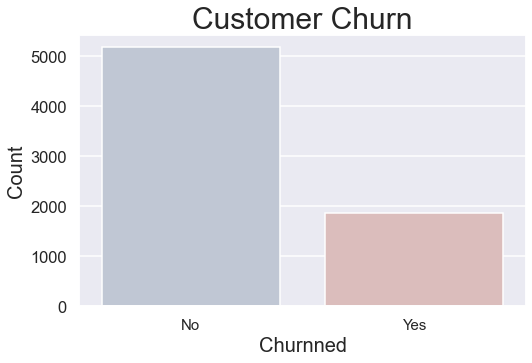

In [162]:
#Plotting target variables
fig, ax = plt.subplots(figsize=(8,5))
a=df["churn_value"].value_counts()
ax=sns.barplot(x=a.index,y=a.values,palette="vlag",ci=None)
sns.set('talk')
ax.set_xticklabels(["No","Yes"],rotation=0,fontsize=15)
ax.set_title("Customer Churn",fontsize=30)
ax.set_ylabel("Count",fontsize=20)
ax.set_xlabel("Churnned",fontsize=20)
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/Target', dpi=300)

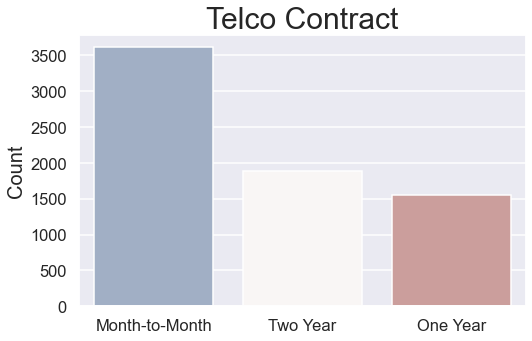

In [46]:
# Plotting the amount of cutomers that there are per contract that the company provides. 
a=df["tel_contract"].value_counts()
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.barplot(x=a.index,y=a.values,palette="vlag",ci=None)
sns.set('talk')
ax.set_title("Telco Contract",fontsize=30)
ax.set_ylabel("Count",fontsize=20)
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/contract', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


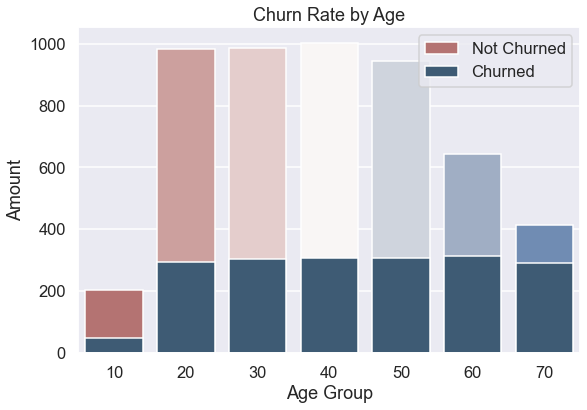

In [71]:
#Plotting a comparisonm between churned and stayed customers grouped by age.
fig, ax = plt.subplots(figsize=(9,6))
yes=pd.melt(df[df.churn_value==1][["churn_value","age","latitude"]].groupby(["age","churn_value"]).count().T)
no=pd.melt(df[df.churn_value==0][["churn_value","age","latitude"]].groupby(["age","churn_value"]).count().T)
ax=sns.barplot(no.age,no.value,palette="vlag_r",ci=None,label='No')
ax=sns.barplot(yes.age,yes.value,color="#355C7D",ci=None)
ax.set_xlabel("Age Group")
ax.set_ylabel("Amount")
ax.set_title("Churn Rate by Age")
ax.legend(["Not Churned","Churned"])
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/churn_age', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


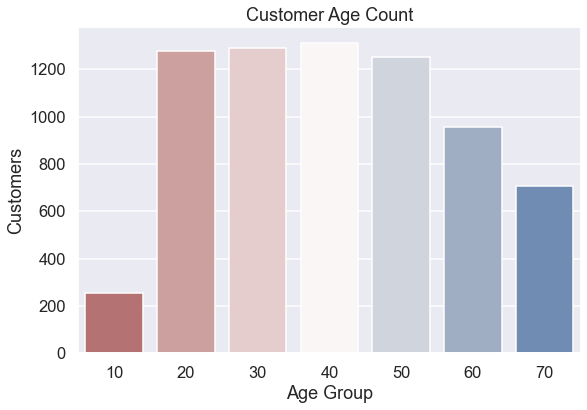

In [163]:
#Plotting each customer age group to get an idea of how many customers there are in each group.
a=pd.melt(df[["age","latitude"]].groupby("age").count().T)
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.barplot(a.age,a.value,palette="vlag_r")
ax.set_xlabel("Age Group")
ax.set_ylabel("Customers")
ax.set_title("Customer Age Count")
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/age_groups', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


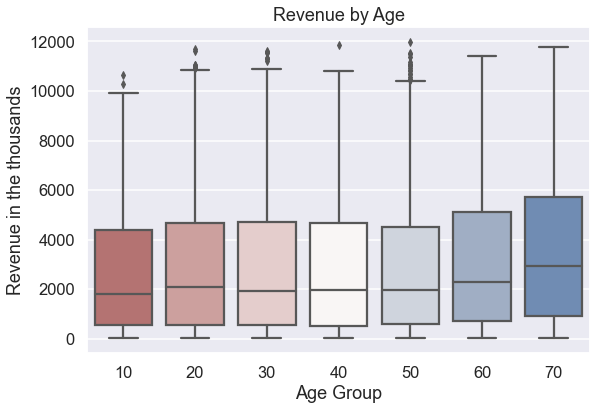

In [161]:
#Plotting how much revenue each age group generates.
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.boxplot(df.age,df.total_revenue,palette="vlag_r")
ax.set_xlabel("Age Group")
ax.set_ylabel("Revenue in the thousands")
ax.set_title("Revenue by Age")
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/revenue_age', dpi=300)

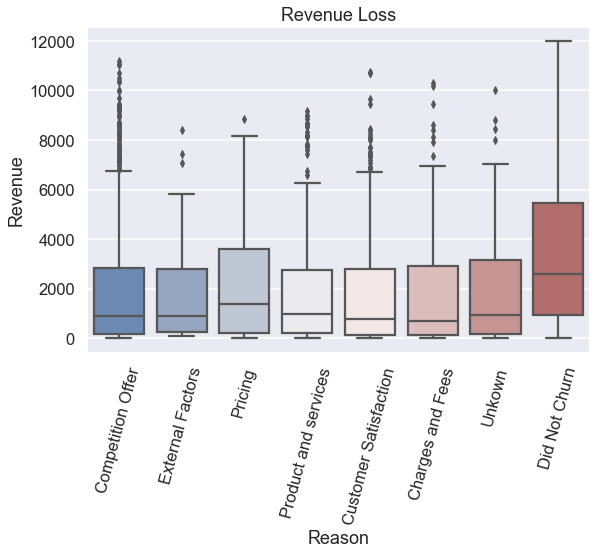

In [165]:
# Plotting the revenue that was lost from the customers that left and why they left. 
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.boxplot(x=df.tel_churn_reason,y=df.total_revenue,palette="vlag")
sns.set('talk')
ax.set_xticklabels(["Competition Offer","External Factors","Pricing","Product and services","Customer Satisfaction","Charges and Fees","Unkown","Did Not Churn"],rotation=75)
ax.set_xlabel("Reason")
ax.set_ylabel("Revenue")
ax.set_title("Revenue Loss")
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/revenue_loss', dpi=300)

In [209]:
#Loading the coeficients that were generated by Gridsearch LR 
coef=pd.read_csv("coeficient.csv",index_col="Unnamed: 0")

#Calculating the probability of each coefiecient
coef.coef=[(np.exp(x))-1 for x in coef.coef]
coef=coef.iloc[coef.coef.sort_values().index]
coef=pd.concat([coef.iloc[:5],coef.iloc[-5:]]).reset_index(drop=True)

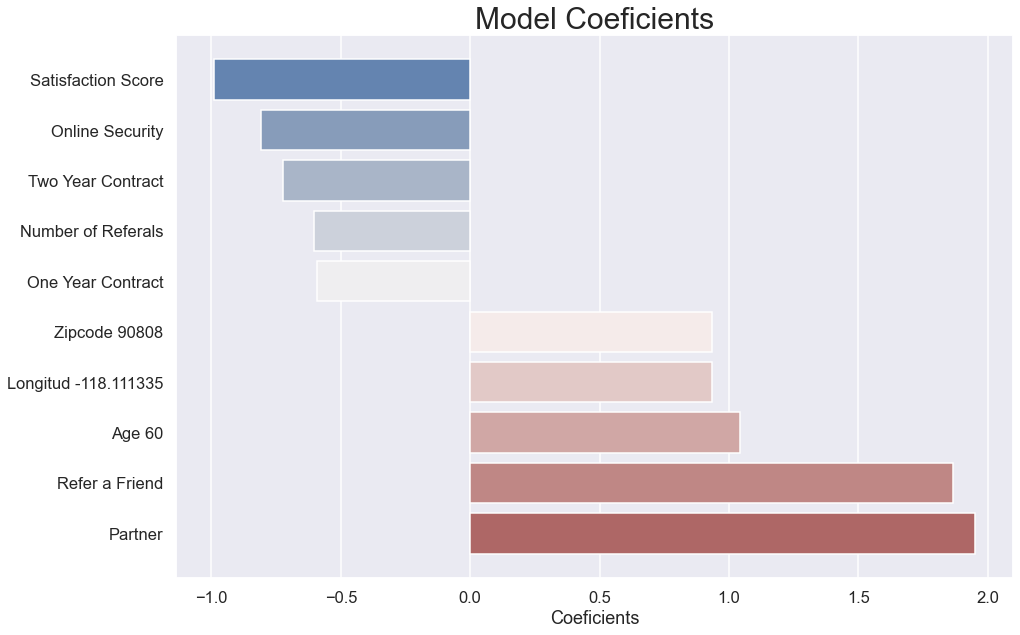

In [211]:
plt.figure(figsize=(15,10))
sns.set('talk')
ax=sns.barplot(x=coef.coef,y=coef.features,orient='h',palette="vlag",ci=None)
ax.set_xlabel('Coeficients')
ax.set_title('Model Coeficients',fontsize=30)
ax.set_ylabel("")
ax.set_yticklabels(["Satisfaction Score","Online Security","Two Year Contract","Number of Referals","One Year Contract","Zipcode 90808","Longitud -118.111335","Age 60","Refer a Friend","Partner"])
ax.plot()
plt.savefig('/Users/carlosruiz/Desktop/Mod_5_project/Images/coeficients', dpi=300)